# Zomato Dataset Exploratory Data Analysis -EDA

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df = pd.read_csv("zomato.csv",encoding = 'latin-1')

In [13]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [14]:
df.columns

Index([u'Restaurant ID', u'Restaurant Name', u'Country Code', u'City',
       u'Address', u'Locality', u'Locality Verbose', u'Longitude', u'Latitude',
       u'Cuisines', u'Average Cost for two', u'Currency', u'Has Table booking',
       u'Has Online delivery', u'Is delivering now', u'Switch to order menu',
       u'Price range', u'Aggregate rating', u'Rating color', u'Rating text',
       u'Votes'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
df.shape

(9551, 21)

# Understanding the Data
1. Missing Values
2. Explore about numerical values
3. Explore about categorical values
4. Finding Relationship between features

## Checking for Missing Values-Method:1

In [8]:
df.info().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

AttributeError: 'NoneType' object has no attribute 'sum'

## Checking for missing values :Method-2

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]

We could see that feature Cuisines is having null values. 

## Checking for missing values : Heat Map method

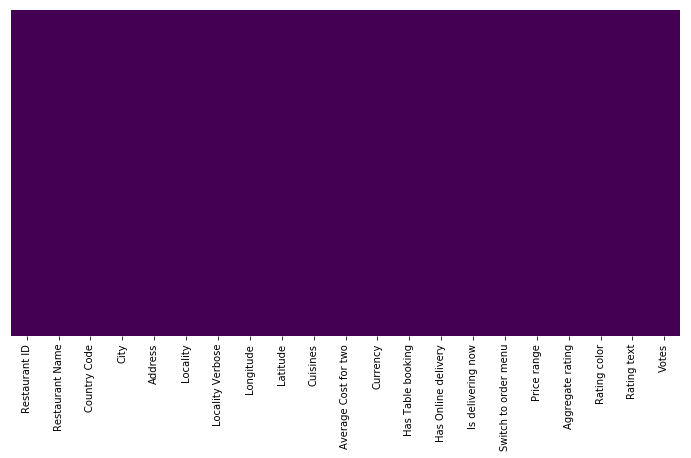

In [16]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap = 'viridis')


In [19]:
df_country = pd.read_excel("Country-code.xlsx")

In [20]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


## Merging two Data frames

In [21]:
zomato_df = pd.merge(df,df_country,on= 'Country Code' , how = 'left')

In [22]:
zomato_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [23]:
zomato_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [24]:
zomato_df.columns

Index([u'Restaurant ID', u'Restaurant Name', u'Country Code', u'City',
       u'Address', u'Locality', u'Locality Verbose', u'Longitude', u'Latitude',
       u'Cuisines', u'Average Cost for two', u'Currency', u'Has Table booking',
       u'Has Online delivery', u'Is delivering now', u'Switch to order menu',
       u'Price range', u'Aggregate rating', u'Rating color', u'Rating text',
       u'Votes', u'Country'],
      dtype='object')

In [25]:
country_names = zomato_df.Country.value_counts().index

In [26]:
country_names

Index([u'India', u'United States', u'United Kingdom', u'Brazil',
       u'South Africa', u'UAE', u'New Zealand', u'Turkey', u'Australia',
       u'Phillipines', u'Indonesia', u'Sri Lanka', u'Singapore', u'Qatar',
       u'Canada'],
      dtype='object')

In [27]:
country_values = zomato_df.Country.value_counts().values

In [28]:
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0xde97ba8>,
 [Text(-1.05226,0.320557,u'India'),
  Text(0.991133,-0.477132,u'United States'),
  Text(1.05729,-0.303557,u'United Kingdom'),
  Text(1.07014,-0.254564,u'Brazil'),
  Text(1.07935,-0.212137,u'South Africa'),
  Text(1.08688,-0.169379,u'UAE'),
  Text(1.09186,-0.133544,u'New Zealand'),
  Text(1.09479,-0.10693,u'Turkey'),
  Text(1.09663,-0.0860256,u'Australia'),
  Text(1.09781,-0.0694236,u'Phillipines'),
  Text(1.09868,-0.0538898,u'Indonesia'),
  Text(1.09931,-0.0390686,u'Sri Lanka'),
  Text(1.09972,-0.0246019,u'Singapore'),
  Text(1.09995,-0.0101309,u'Qatar'),
  Text(1.1,-0.00144739,u'Canada')])

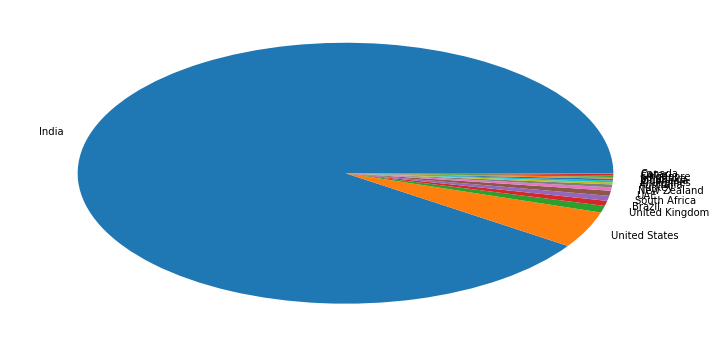

In [29]:
plt.pie(country_values, labels = country_names)

([<matplotlib.patches.Wedge at 0xdf359e8>,
 [Text(-1.08297,0.192787,u'India'),
  Text(1.07728,-0.222405,u'United States'),
  Text(1.09959,-0.0301578,u'United Kingdom')])

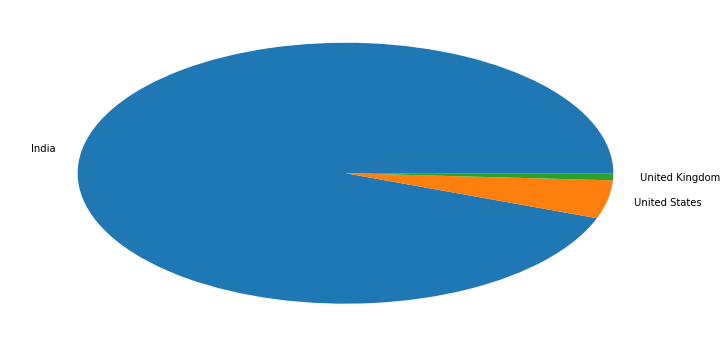

In [31]:
plt.pie(country_values[:3], labels = country_names[:3])
#top 3 countries

([<matplotlib.patches.Wedge at 0x10bd3a20>,
 [Text(-1.08297,0.192787,u'India'),
  Text(1.07728,-0.222405,u'United States'),
  Text(1.09959,-0.0301578,u'United Kingdom')],
 [Text(-0.590713,0.105156,'94.39%'),
  Text(0.587608,-0.121312,'4.73%'),
  Text(0.599774,-0.0164497,'0.87%')])

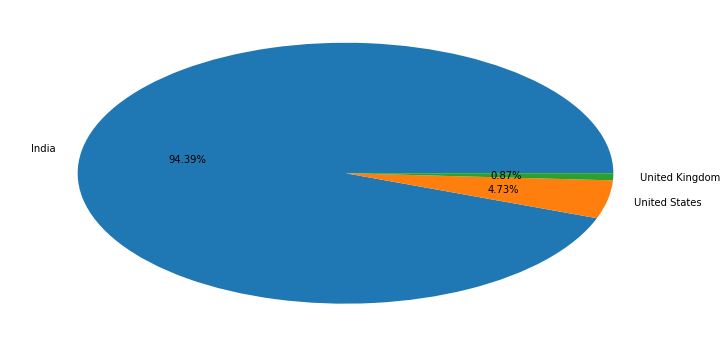

In [32]:
plt.pie(country_values[:3], labels = country_names[:3],autopct = '%1.2f%%')

Infererence : 
1. We could see India is having more number of transactions with almost 94.39% 
2. Next we have United states with 4.73% and United Kingdom with 0.87%

## Ratings behaviour 


In [33]:
zomato_df.columns

Index([u'Restaurant ID', u'Restaurant Name', u'Country Code', u'City',
       u'Address', u'Locality', u'Locality Verbose', u'Longitude', u'Latitude',
       u'Cuisines', u'Average Cost for two', u'Currency', u'Has Table booking',
       u'Has Online delivery', u'Is delivering now', u'Switch to order menu',
       u'Price range', u'Aggregate rating', u'Rating color', u'Rating text',
       u'Votes', u'Country'],
      dtype='object')

In [34]:
zomato_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns = {0 : 'Rating count'})

#Grouping by required rating columns
#Giving size for display of values.
# Resetting index to remove intial index
# Renaming the new output column as Rating count by using Rename function with mapping.

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [35]:
ratings = zomato_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns = {0 : 'Rating count'})

# storing in variable as ratings

In [36]:
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Interpretation : 
From the above ratings we can see it is distributed into several colors and text.

1. If rating is between 4.5 to 4.9 -----> "Excellent"
2. If rating is between 4.0 to 4.4 -----> "Very Good"
3. If rating is between 3.5 to 3.9 -----> "Good"
4. If rating is between 2.5 to 3.4 -----> "Average"
5. If rating is between 1.8 to 2.4 -----> "Poor"
5. Rating = 0 it means most customers are not rated at all

In [37]:
ratings.head(5)

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


## Bar Plot Visualization for Ratings

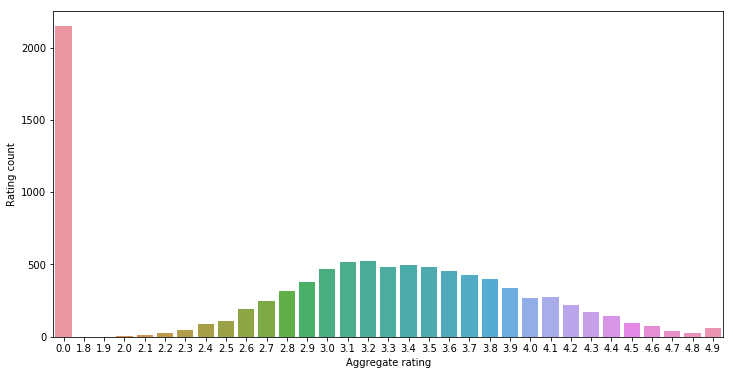

In [38]:
#Aggregate Rating vs Rating count

sns.barplot(x= 'Aggregate rating', y= 'Rating count', data = ratings)

Interpretation : 
1.  We could see no one rated (0) count is very high
2.  Also ratings are most in between 2.8 to 3.9


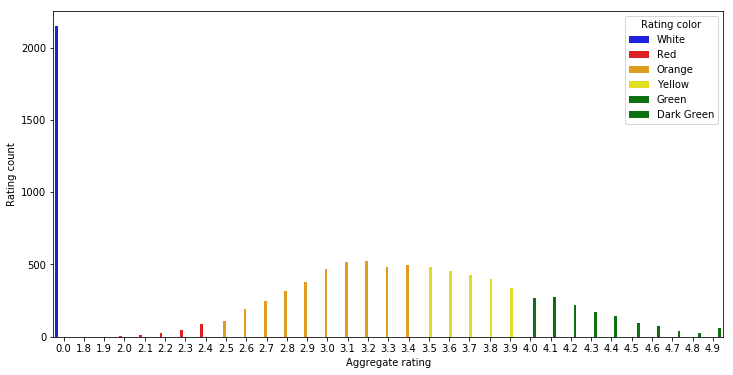

In [39]:
# with Rating color

#sns.barplot(x = 'Aggregate rating', y = 'Rating count', hue = 'Rating color', data = ratings)

#
sns.barplot(x = 'Aggregate rating', y = 'Rating count', hue = 'Rating color', data = ratings, palette= ['blue', 'red', 'orange', 'yellow', 'green', 'green'])

Inference : 
Now bar plot shows the ratings with respect to the ratings colors. 

## Count plot for Rating color:- 

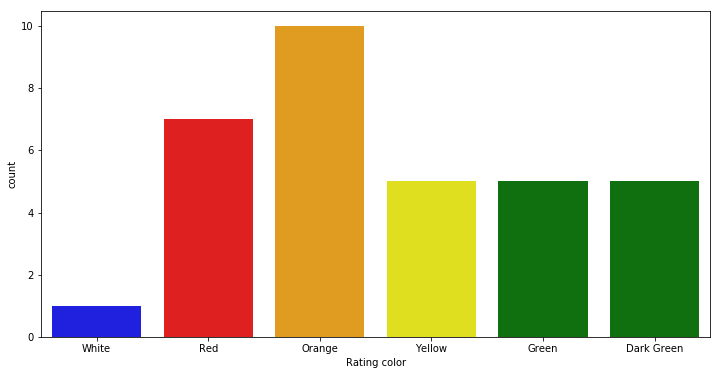

In [40]:
sns.countplot(x='Rating color' , data = ratings, palette= ['blue', 'red', 'orange', 'yellow', 'green', 'green'])

## Countries with Zero Rating :- 

In [42]:
zomato_df.columns

Index([u'Restaurant ID', u'Restaurant Name', u'Country Code', u'City',
       u'Address', u'Locality', u'Locality Verbose', u'Longitude', u'Latitude',
       u'Cuisines', u'Average Cost for two', u'Currency', u'Has Table booking',
       u'Has Online delivery', u'Is delivering now', u'Switch to order menu',
       u'Price range', u'Aggregate rating', u'Rating color', u'Rating text',
       u'Votes', u'Country'],
      dtype='object')

In [47]:
zomato_df[zomato_df["Rating color"]=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


1. We could see that India is the country with more number of "zero" ratings


# Currency used by countries


In [53]:
zomato_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


This shows the 14 countries currency with each type

# Countries with Online delivery option

In [56]:
zomato_df[zomato_df['Has Online delivery'] == 'Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

It means online delivery is only available in India and UAE

In [61]:
zomato_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


This is the list with each country wheather it has online delivery available or not. 
* In India in few region online delivery not found.

# City Distribution:-

In [62]:
zomato_df.columns

Index([u'Restaurant ID', u'Restaurant Name', u'Country Code', u'City',
       u'Address', u'Locality', u'Locality Verbose', u'Longitude', u'Latitude',
       u'Cuisines', u'Average Cost for two', u'Currency', u'Has Table booking',
       u'Has Online delivery', u'Is delivering now', u'Switch to order menu',
       u'Price range', u'Aggregate rating', u'Rating color', u'Rating text',
       u'Votes', u'Country'],
      dtype='object')

In [68]:
city_labels = zomato_df.City.value_counts().index
city_vlaues = zomato_df.City.value_counts().values

([<matplotlib.patches.Wedge at 0x1336e2b0>,
 [Text(-0.614535,0.91233,u'New Delhi'),
  Text(0.0623675,-1.09823,u'Gurgaon'),
  Text(0.878905,-0.661458,u'Noida'),
  Text(1.09222,-0.130581,u'Faridabad'),
  Text(1.09995,-0.0108711,u'Ghaziabad')],
 [Text(-0.335201,0.497635,'68.87%'),
  Text(0.0340187,-0.599035,'14.07%'),
  Text(0.479402,-0.360795,'13.59%'),
  Text(0.595757,-0.0712261,'3.16%'),
  Text(0.599971,-0.0059297,'0.31%')])

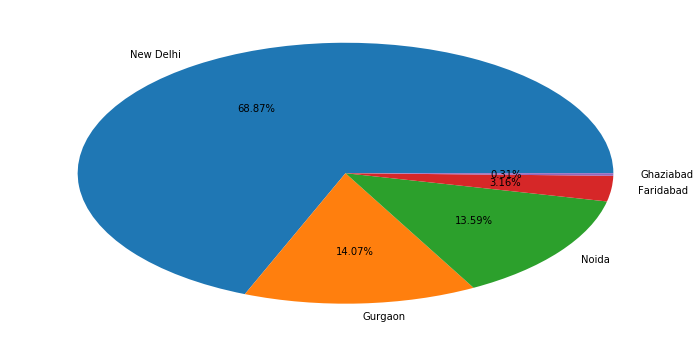

In [80]:
plt.pie(city_vlaues[:5],labels =city_labels[:5], autopct = '%1.2f%%' )


We could see **New Delhi** is in the **top** one posiiton with **Zomato transactions**.

## Summary: We have done several EDA for the Zomato Dataset and found important key insights from the countrie and cities with various outcomes. 